# Probability Distribution

La distribución de probabilidad de una variable aleatoria continua, conocidas como funciones de distribución de probabilidad, son las funciones que toman valores continuos. La probabilidad de observar cualquier valor individual es igual a 0 ya que el número de valores que puede asumir la variable aleatoria es infinito. Por ejemplo, una variable aleatoria $X$ Puede tomar todos los valores sobre un intervalo de números reales. Entonces la probabilidad de que $X$ Está en el conjunto de resultados $A$ , $P(A)$, se define como el área por encima de $A$ y bajo una curva. La curva, que representa una función $P(x)$., debe cumplir con lo siguiente : 

1. La curva no tiene valores negativos $P(x)>0 \forall  x $ <br>
    
2. El área total debajo de la curva es igual a $1$ <br>    
    
>Una curva que cumple estos requisitos se conoce a menudo como una curva de densidad. Algunos ejemplos de distribuciones de probabilidad continuas son la distribución normal, la distribución dirichlet, la distribución beta, la distribución binomial,la distribución bernoulli, etc
<a href="https://www.datacamp.com/community/tutorials/probability-distributions-python">[1]

### Normal Distribution (Gaussian Distribution)

La distribución normal, también conocida como distribución gaussiana, es ubicua en la ciencia de datos. Lo encontrará en muchos lugares, especialmente en temas de inferencia estadística. Es uno de los supuestos de muchos algoritmos de ciencia de datos también.

- Dos parámetros: media (centro del pico) y desviación estándar (propagación); $N(\mu, \sigma)$
- podemos estimar parámetros de $N(\mu, \sigma^2)$ por medio de la muestra ($\bar{x})$ and sample variance ($s^2$)

Una distribución normal tiene una curva de densidad en forma de campana descrita por su media $\mu$ y desviación estándar $\sigma$. La curva de densidad es simétrica, centrada alrededor de su media, con su dispersión determinada por su desviación estándar que muestra que los datos cercanos a la media son más frecuentes en la ocurrencia que los datos que están lejos de la media. La función de distribución de probabilidad de una curva de densidad normal con media $\mu$ y desviación estándar $\sigma$ en un punto determinado $x$ viene dada por:

$$f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \; \exp\bigg(-\frac{(x-\mu)^2}{2\sigma^2}\bigg)$$


   
- Distribución normal estándar con media cero y varianza unitaria, $N(0, 1)$:

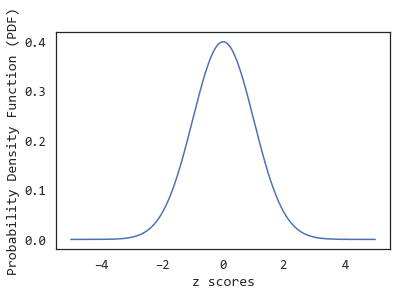

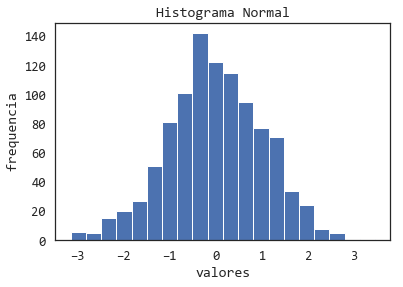

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def univariate_gaussian_pdf(x, mean, variance):
    return (1. / np.sqrt(2*np.pi*variance) * 
            np.exp(- ((x - mean)**2 / 2.*variance)))

mean = 0
stddev = 1
x = np.arange(-5, 5, 0.01)
y = univariate_gaussian_pdf(x, mean, stddev**2)
plt.plot(x, y)
plt.xlabel('z scores')
plt.ylabel('Probability Density Function (PDF)')
plt.show()

# histograma
aleatorios = np.random.standard_normal(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Normal')
plt.show()

### Distribución de Dirichlet
> La distribución de Dirichlet define una densidad de probabilidad para una entrada de valor vectorial que tiene las mismas características que nuestro parámetro multinomial (θ). Comencemos con la fórmula para la densidad de probabilidad asociada con una distribución de Dirichlet

$$Dir(\alpha) \longrightarrow P(\theta|\alpha)=\frac{\Gamma(\sum_{i=1}^{k}\alpha_{i} )}{\prod_{i=1}^{k} \Gamma (\alpha_{i}) }\prod_{i=1}^{k} \theta_{i}^{\alpha_{i}-1}$$

No es importante entender la fórmula en su totalidad, pero vale la pena mencionar algunos detalles. La distribución de Dirichlet está parametrizada por el vector $\alpha$, que tiene el mismo número de elementos $k$ que nuestro parámetro multinomial. Entonces, puede interpretar que $p (\theta | \alpha)$  responde a la pregunta "¿cuál es la densidad de probabilidad asociada con la distribución multinomial $\theta$, dado que nuestra distribución de Dirichlet tiene el parámetro $\alpha$". Nuestro objetivo es visualizar cómo $Dir (\alpha)$  varía en el símplex de los valores permitidos de θ para un valor dado de \alpha.<a href="http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/">[1]</a> 

Antes de que podamos trazar nuestras distribuciones de Dirichlet, debemos hacer tres cosas:

- Generar un conjunto de x-ycoordenadas sobre nuestro triángulo equilátero.

- Mapea las x-y coordenadas al espacio de coordenadas 2-simplex

- Calcular $Dir (\alpha)$ para cada punto

Hay muchas maneras en que podríamos generar un conjunto de puntos sobre el símplex. Por ejemplo, podríamos muestrear aleatoriamente un Dirichlet uniforme y asignar esos puntos al x-y espacio. Pero ese enfoque puede dar como resultado artefactos de visualización indeseables cerca de los límites del símplex para valores pequeños de $\alpha$. A partir de la versión 1.3, matplotlib proporciona algunas funciones convenientes que podemos usar para generar y refinar mallas triangulares. Comencemos por las esquinas de nuestro triángulo equilátero y definamos una malla triangular que consiste en un solo elemento



In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seaborn as sns
from math import gamma
from operator import mul
from functools import reduce

sns.set(style='white', font_scale=1.2, font='consolas')
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])
_midpoints = [(_corners[(i + 1) % 3] + _corners[(i + 2) % 3]) / 2.0 \
              for i in range(3)]

A continuación, subdividimos el triángulo en una malla triangular y trazamos los triángulos subdivididos y originales

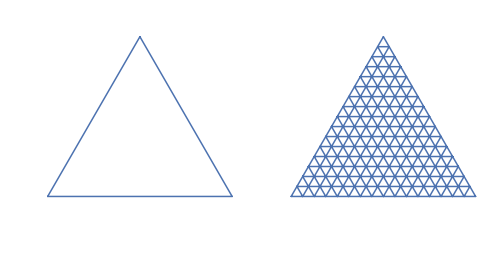

In [50]:
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

plt.figure(figsize=(8, 4))
for (i, mesh) in enumerate((triangle, trimesh)):
    plt.subplot(1, 2, i+ 1)
    plt.triplot(mesh)
    plt.axis('off')
    plt.axis('equal')

La malla de arriba es solo un ejemplo: usaremos una malla mucho más fina para nuestras parcelas.

A continuación, necesitamos asignar las coordenadas x-y de los vértices de malla al espacio de coordenadas simplex (a.k.a. coordenadas baricéntricas). Hay varias formas de realizar esta transformación. Usaré un método simple que usa álgebra vectorial. Para algunos valores de α, el cálculo del Dirichlet pdf puede volverse numéricamente inestable en los límites del simplex, por lo que nuestra función de conversión tendrá una tolerancia opcional que evitará los valores de coordenadas baricéntricos directamente en el límite del simplex.

Teniendo las coordenadas baricéntricas para nuestros vértices de malla símplex, necesitamos calcular los valores del pdf de Dirichlet para estas coordenadas


In [85]:
def plot_mesh(corners):
    """Subdivide the triangle into a triangular mesh and plot the original and subdivided triangles."""
    triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=4)
    
    plt.figure(figsize=(6, 4))
    for i, mesh in enumerate((triangle, trimesh)):
        plt.subplot(1, 2, i+1)
        plt.triplot(mesh)
        plt.axis('off')
        plt.axis('equal')  

class Dirichlet(object):
    def __init__(self, alpha):
        '''Creates Dirichlet distribution with parameter `alpha`.'''
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])
    def sample(self, N):
        '''Generates a random sample of size `N`.'''
        return np.random.dirichlet(self._alpha, N)

Y, por último, solo necesitamos una función para dibujar los contornos de una distribución. La función dibujará contornos pdf para una distribución de Dirichlet, donde θ1, θ2, y θ3 corresponden a las esquinas inferior izquierda, inferior derecha y superior del triángulo renderizado, respectivamente.

In [52]:
 class PlotDirichlet:

    def __init__(self, corners):
        self._corners = corners
        self._triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
        # Midpoints of triangle sides opposite of each corner
        self._midpoints = [(corners[(i+1) % 3] + corners[(i+2) % 3]) / 2.0 for i in range(3)]
        
    def xy2bc(self, xy, tol=1.e-3):
        s = [(self._corners[i] - self._midpoints[i]).dot(xy - self._midpoints[i]) / 0.75 for i in range(3)]
        return np.clip(s, tol, 1.0-tol)
    
    def draw_pdf_contours(self, ax, dist, label=None, nlevels=200, subdiv=8, **kwargs):
        """Draw pdf contours for a Dirichlet distribution"""
        # Subdivide the triangle into a triangular mesh
        refiner = tri.UniformTriRefiner(self._triangle)
        trimesh = refiner.refine_triangulation(subdiv=subdiv)
        
        # convert to barycentric coordinates and compute probabilities of the given distribution 
        pvals = [dist.pdf(self.xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]
    
        ax.tricontourf(trimesh, pvals, nlevels, **kwargs)
        #plt.axis('equal')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 0.75**0.5)
        ax.set_title(str(label))
        ax.axis('off') 
        return ax

Vamos a empezar con algunas distribuciones de Dirichlet simétricas. El caso de $ \alpha = (1,1,1) $ produce una distribución uniforme, donde todos los puntos en el simplex son igualmente probables:

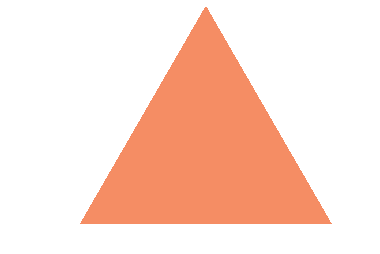

In [58]:
draw_pdf_contours(Dirichlet([1, 1, 1]))     

Para valores de $ \alpha_{i} <1 $, la distribución se concentra en las esquinas y en los límites del símplex.

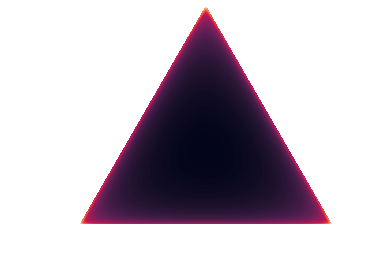

In [60]:
draw_pdf_contours(Dirichlet([0.999, 0.999, 0.999]))

Para los valores de $\alpha_{i}> 1$, la distribución tiende hacia el centro del símplex.

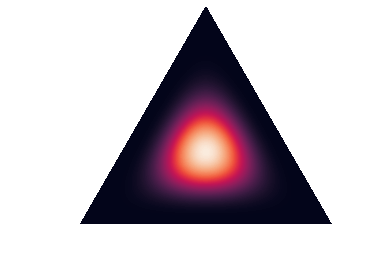

In [62]:
draw_pdf_contours(Dirichlet([5, 5, 5]))

A medida que aumenta $\alpha_{i}$, la distribución se concentra más estrechamente alrededor del centro del símplex.

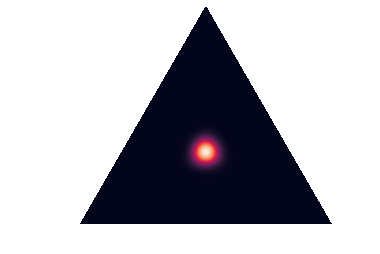

In [64]:
draw_pdf_contours(Dirichlet([50, 50, 50]))

En el contexto de nuestro ejemplo de fabricación de dados, produciríamos dados consistentemente justos en el límite como $\alpha \rightarrow \infty$.

Para un Dirichlet simétrico con$ \alpha > 1$, produciremos dados justos, en promedio. Si el objetivo es producir dados cargados (por ejemplo, con una mayor probabilidad de tirar un 3), desearíamos una distribución Dirichlet asimétrica (no central) con un valor más alto para $ \alpha _{3}$.

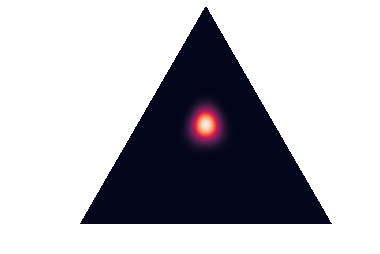

In [66]:
draw_pdf_contours ( Dirichlet ([ 30 ,  30 ,  50 ]))

Finalmente, aquí hay un par más, solo para mostrar cómo las distribuciones varían con 

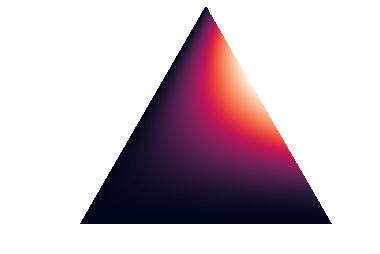

In [68]:
draw_pdf_contours ( Dirichlet ([ 1 ,  2 ,  3 ]))

si lo vemos en términos de datos sería así así la consetrasion de puntos en términos de la distribución multivariada 

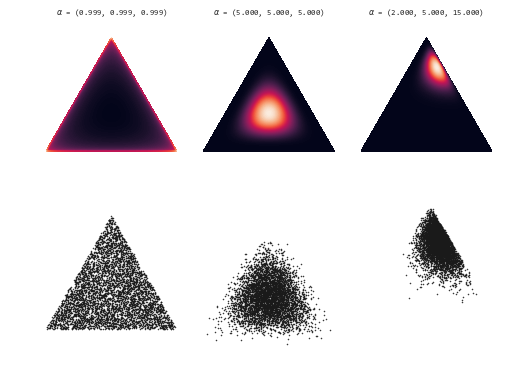

In [96]:
def plot_points(X, barycentric=True, border=True, **kwargs):
    if barycentric is True:
        X = X.dot(_corners)
    plt.plot(X[:, 0], X[:, 1], 'k.', ms=1, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

if __name__ == '__main__':
    f = plt.figure(figsize=(8, 6))
    alphas = [[0.999] * 3,
              [5] * 3,
              [2, 5, 15]]
    for (i, alpha) in enumerate(alphas):
        plt.subplot(2, len(alphas), i + 1)
        dist = Dirichlet(alpha)
        draw_pdf_contours(dist)
        title = r'$\alpha$ = (%.3f, %.3f, %.3f)' % tuple(alpha)
        plt.title(title, fontdict={'fontsize': 8})
        plt.subplot(2, len(alphas), i + 1 + len(alphas))
        plot_points(dist.sample(5000))
    plt.savefig('dirichlet_plots.png')
    

para calcular la distribución de dirichlet con python es.

In [95]:
from scipy.stats import dirichlet
quantiles = np.array([0.2, 0.2, 0.6])  # specify quantiles
alpha = np.array([0.4, 5, 15])  # specify concentration parameters
dirichlet.pdf(quantiles, alpha)

0.2843831684937255

### Distribución beta

>Utilice la distribución beta para variables aleatorias entre 0 y 1. La distribución beta suele utilizarse para modelar la distribución de estadísticos de orden (por ejemplo, el estadístico de orden késimo de una muestra de variables n uniformes (0, 1) tiene una distribución beta (k, n + 1 – k)) y para modelar eventos que se definen por valos mínimos y máximos. La escala de la distribución beta suele modificarse para modelar el tiempo hasta la culminación de una tarea. La distribución beta también se usa en estadísticas bayesianas, por ejemplo, como la distribución de valores previos de una probabilidad binomial.<a href="https://support.minitab.com/es-mx/minitab/18/help-and-how-to/probability-distributions-and-random-data/supporting-topics/distributions/beta-distribution/">[2]</a> 


$$P(x, p, q) = \frac{1}{B(p+q)} x^{p-1} 
(1-x)^{q-1},$$


En dónde los parámetros $p$ y $q$ son números reales positivos, la variable $x$ satisface la condición $0\leq x \leq 1$ y $B(p,q)$ es la función beta. Las aplicaciones de la Distribución Beta incluyen el modelado de variables aleatorias que tienen un rango finito de a hasta $b$. Un ejemplo de ello es la distribución de los tiempos de actividad en las redes de proyectos. La Distribución Beta se utiliza también con frecuencia como una probabilidad a priori para proporciones binomiales en el análisis bayesiano.<a href="https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/">[3]</a> 

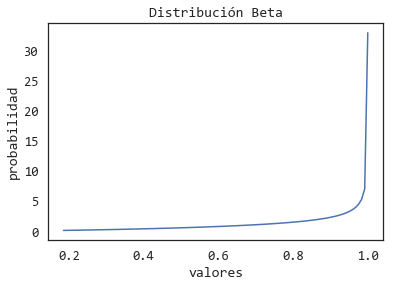

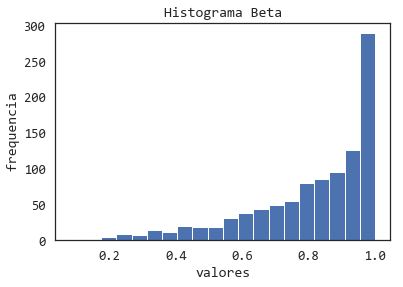

In [4]:
import scipy.stats as ss
import matplotlib.pyplot as plt
a, b = 2.3, 0.6 # parametros de forma.
beta = ss.beta(a, b)
x = np.linspace(beta.ppf(0.01),
                beta.ppf(0.99), 100)
fp = beta.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Beta')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

# histograma
aleatorios = np.random.beta(a, b,1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Beta')
plt.show()

### Distribución Bernoulli

Utilice la distribución de Bernoulli cuando un proceso aleatorio tenga exactamente dos resultados: evento o no evento. Por ejemplo, en el campo de la calidad, un producto se puede clasificar como bueno o malo.

Las variables de Bernoulli pueden tomar dos valores numéricos, 0 y 1, donde 1 corresponde a un evento y 0 corresponde a un no evento. Una variable aleatoria $X$ sigue una distribución de Bernoulli si $P(X=1)=p$ y $P(X=0)=1-p$, donde p es la probabilidad de ocurrencia del evento.

La distribución de Bernoulli es una distribución discreta que está relacionada con muchas distribuciones, tales como la distribución binomial, geométrica y binomial negativa. La distribución de Bernoulli representa el resultado de 1 ensayo. Las secuencias de ensayos de Bernoulli independientes generan las demás distribuciones: la distribución binomial modela el número de éxitos en n ensayos, la distribución geométrica modela el número de fallas antes del primer éxito y la distribución binomial negativa modela el número de fallas antes del éxito .

Esta gráfica muestra una distribución binomial que tiene 1 ensayo y una probabilidad de evento de 0.15. Una distribución binomial con 1 ensayo es igual que una distribución de Bernoulli.<a href="https://support.minitab.com/es-mx/minitab/18/help-and-how-to/probability-distributions-and-random-data/supporting-topics/distributions/bernoulli-distribution/">[4]</a> 

 $$P(r;p) = 
   \begin{cases} 
      1-p=q             & \mbox{si } r= 0  (fracaso) \\
      p                 & \mbox{si } r= 1 (exito) 
   \end{cases}
$$


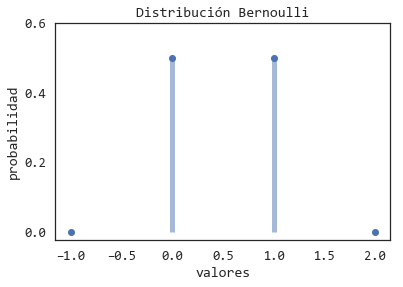

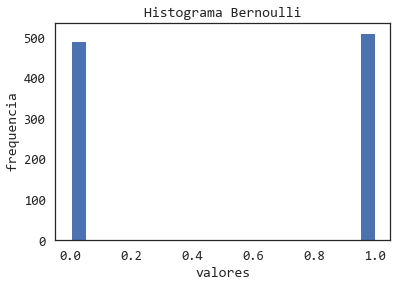

In [8]:
from scipy.stats import bernoulli
# Graficando Bernoulli
p =  0.5 # parametro de forma 
bernoulli = ss.bernoulli(p)
x = np.arange(-1, 3)
fmp = bernoulli.pmf(x) # Función de Masa de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fmp, 'bo')
ax.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6])
plt.title('Distribución Bernoulli')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


# histograma
aleatorios = bernoulli.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Bernoulli')
plt.show()

### Distribución binomial

Una distribución binomial es una distribución discreta que modela el número de eventos en un número de ensayos fijo. Cada ensayo tiene dos resultados posibles, y evento es el resultado de interés en un ensayo.

Utilice la distribución binomial para describir un proceso donde los resultados se pueden etiquetar como un evento o un no evento y cuando esté interesado en la ocurrencia de un evento y no en su magnitud. Por ejemplo, un elemento pasa o no pasa una inspección o un partido político gana o pierde. La distribución binomial se usa frecuentemente en control de calidad, sondeos de opinión pública, investigaciones médicas y seguros.<a href="https://support.minitab.com/es-mx/minitab/18/help-and-how-to/probability-distributions-and-random-data/supporting-topics/distributions/binomial-distribution/">[5]</a> 

   $$P(r;N;p) =\binom{n}{k} p^{r} (1-p)^{N-r} $$
   
En dónde $r$ con la condición $0\leq r\leq N$ y el parámetro $N (N>0)$ son enteros; y el parámetro $p (0\leq p\leq 1)$ es un número real. La Distribución Binomial describe la probabilidad de exactamente r éxitos en N pruebas si la probabilidad de éxito en una sola prueba es $p$<a href="https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/">[6]</a> 

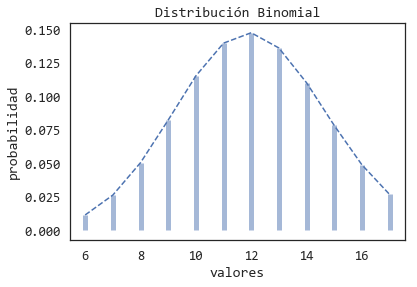

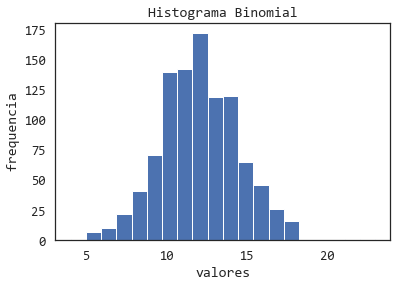

In [12]:
# Graficando Binomial
N, p = 30, 0.4 # parametros de forma 
binomial = ss.binom(N, p) # Distribución
x = np.arange(binomial.ppf(0.01),
              binomial.ppf(0.99))
fmp = binomial.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


# histograma
aleatorios = np.random.binomial(N, p, 1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Binomial')
plt.show()